<a href="https://colab.research.google.com/github/audwls4545/metaverse/blob/main/yolov8_seg_%EC%88%98%EC%A0%95%EC%A4%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 614.2/614.2 kB 5.1 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

model = YOLO('/content/runs/segment/train/weights/best.pt')

result = model('https://ultralytics.com/images/bus.jpg')

100%|██████████| 6.73M/6.73M [00:00<00:00, 62.6MB/s]

100%|██████████| 476k/476k [00:00<00:00, 10.4MB/s]
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 skateboard, 491.2ms
Speed: 24.8ms preprocess, 491.2ms inference, 59.5ms postprocess per image at shape (1, 3, 640, 480)


In [ ]:
len(result)

1

In [ ]:
result[0].masks

WARNING ⚠️ 'Masks.masks' is deprecated. Use 'Masks.data' instead.
WARNING ⚠️ 'Masks.segments' is deprecated. Use 'Masks.xyn' for segments (normalized) and 'Masks.xy' for segments (pixels) instead.


ultralytics.engine.results.Masks object with attributes:

data: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0.,

In [ ]:
for temp in result:
    masks = temp.masks
    for c in temp.boxes.cls:
        print(model.names[int(c)])

person
person
person
bus
person
skateboard


In [ ]:
len(masks)

6

In [ ]:
masks_result = mask

WARNING ⚠️ 'Masks.masks' is deprecated. Use 'Masks.data' instead.
WARNING ⚠️ 'Masks.segments' is deprecated. Use 'Masks.xyn' for segments (normalized) and 'Masks.xy' for segments (pixels) instead.


ultralytics.engine.results.Masks object with attributes:

data: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0.,

In [ ]:
mask = masks[3]
mask_result = mask.data[0].cpu().numpy()
polygon = mask.xy[0]

mask_result

array([[          0,           0,           0, ...,           0,           0,           0],
       [          0,           0,           0, ...,           0,           0,           0],
       [          0,           0,           0, ...,           0,           0,           0],
       ...,
       [          0,           0,           0, ...,           0,           0,           0],
       [          0,           0,           0, ...,           0,           0,           0],
       [          0,           0,           0, ...,           0,           0,           0]], dtype=float32)

In [ ]:
mask_result.shape

(640, 480)

In [ ]:
from PIL import Image
mask_img = Image.fromarray(mask_result,'I')
mask_img = mask_img.convert('RGB')
mask_img.save('mask.jpg')


In [ ]:
import cv2

bus = cv2.imread('bus.jpg')
bus = cv2.resize(bus, (480, 640))
bus.shape

(640, 480, 3)

In [ ]:
mask = cv2.imread('mask.jpg')
mask.shape

(640, 480, 3)

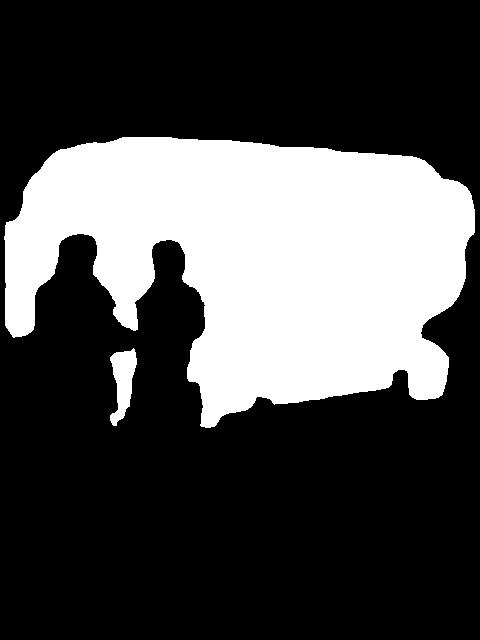

In [ ]:
cv2_imshow(mask)

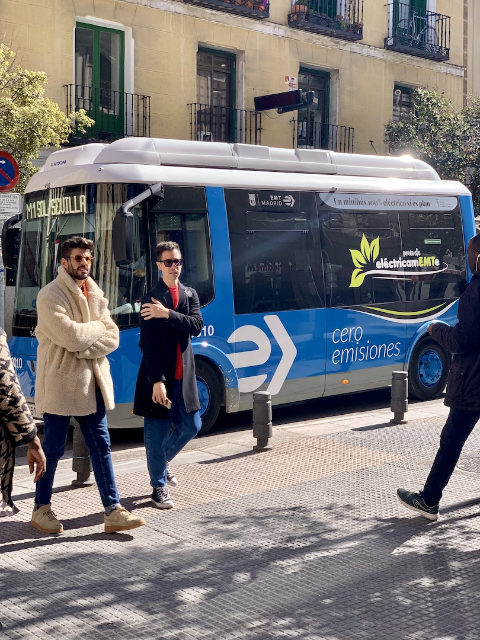

In [ ]:
#최상단에 import 를 추가한다.
from google.colab.patches import cv2_imshow
cv2_imshow(bus)

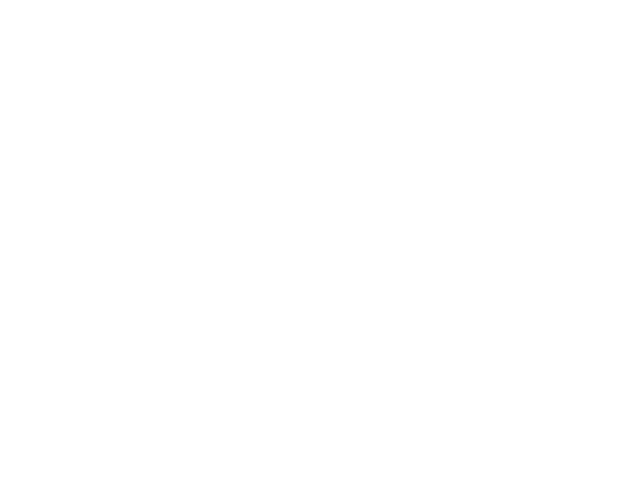

In [ ]:
import numpy as np
back = np.ones((480, 640), dtype=np.uint8) * 255  # white
cv2_imshow(back)

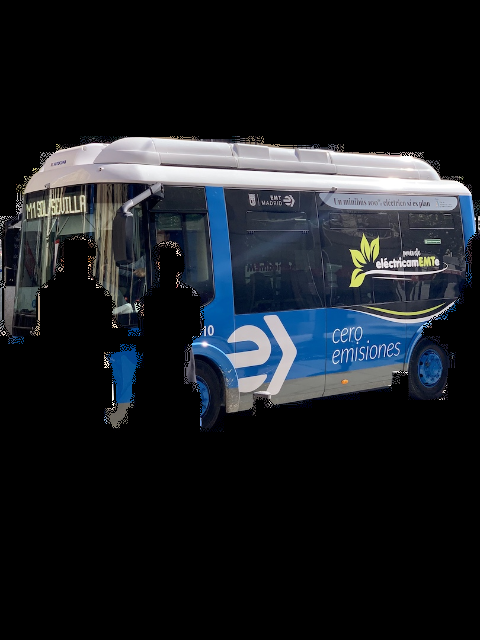

In [ ]:
r = cv2.copyTo(bus, mask, back)
cv2_imshow(r)

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ksasnXLJaN9rWaY1yRcW")
project = rf.workspace("meta-niaah").project("cat-dog-ocsxv")
dataset = project.version(1).download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.0 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=00a495864020a6c288a52d055bf46f9174d99433f24a7870e9e4b38b130162b2
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.170, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to cat-dog-1 in yolov8:: 100%|██████████| 52/52 [00:00<00:00, 1986.83it/s]


In [ ]:
model = YOLO('yolov8n-seg.pt')
model.train(data='/content/cat-dog-1/data.yaml',epochs=30,imgsz=640)

Ultralytics YOLOv8.0.170 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/cat-dog-1/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, o

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x787bc724ee00>
fitness: 0.8571976778846155
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'metrics/precision(M)', 'metrics/recall(M)', 'metrics/mAP50(M)', 'metrics/mAP50-95(M)']
maps: array([    0.58042,      1.1082])
names: {0: 'cat', 1: 'dog'}
plot: False
results_dict: {'metrics/precision(B)': 0.004139957264957265, 'metrics/recall(B)': 1.0, 'metrics/mAP50(B)': 0.48650000000000004, 'metrics/mAP50-95(B)': 0.4434599078525642, 'metrics/precision(M)': 0.004139957264957265, 'metrics/recall(M)': 1.0, 'metrics/mAP50(M)': 0.48650000000000004, 'metrics/mAP50-95(M)': 0.4008708453525641, 'fitness': 0.8571976778846155}
save_dir: PosixPath('runs/segment/train')
seg: ultralytics.utils.metrics.Metric object
speed: {'preprocess': 2.648770809173